In [35]:
import sys
sys.path.insert(0, '../../')
sys.path.insert(0, '../../pyathena/')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import tigradpy as tp
import pyathena as pa

print(tp.__all__)
MtoL = tp.mass_to_lum()

['add_fields', 'mass_to_lum', 'read_athinput', 'read_hst', 'read_starpar_vtk', 'read_zprof', 'read_zprof_all', 'units', 'yt_multipanel']


__IMF averaged mass-to-luminosity conversion factors for simple stellar population__

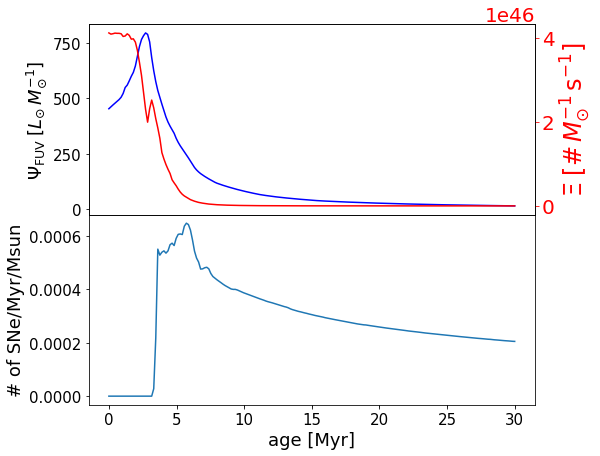

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(8,7), sharex=True,
                         gridspec_kw=dict(hspace=0.0))
plt.sca(axes[0])
age = np.linspace(0, 30.0, 200)
plt.rc('font', size=20)
with plt.rc_context({'ytick.color':'b', 'axes.labelcolor':'b'}):
    plt.plot(age, MtoL.calc_LFUV_SB99(1.0, age), 'b-')
    plt.ylabel(r'$\Psi_{\rm FUV}\;[L_{\odot}\,M_{\odot}^{-1}]$')
    #plt.yscale('log')

with plt.rc_context({'ytick.color':'r', 'axes.labelcolor':'r'}):
    axt = plt.gca().twinx()
    axt.plot(age, MtoL.calc_Qi_SB99(1.0, age), 'r-')
    plt.ylabel(r'$\Xi\;[{\rm \#}\,M_{\odot}^{-1}\,{\rm s}^{-1}]$')
    #plt.yscale('log')

plt.sca(axes[1])
plt.plot(age,MtoL.SNrate(age))
plt.xlabel('age [Myr]', color='k')
plt.ylabel(r'# of SNe/Myr/Msun')

axes[0].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
axes[1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

__Max main-sequence age, mean luminosity (for individual stars)__

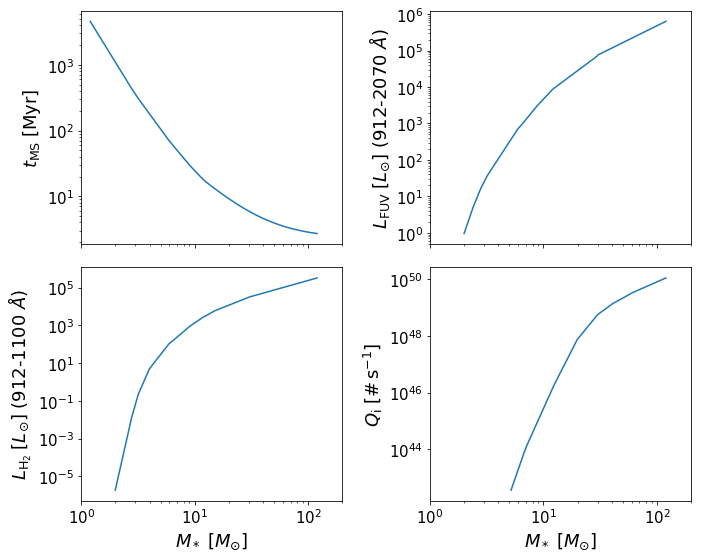

In [34]:
MtoL = tp.mass_to_lum()
mass = np.linspace(1.2, 120.0, 300)

mpl.rcParams['font.size'] = 15.0
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
axes = axes.flatten()
plt.sca(axes[0])
plt.loglog(mass, MtoL.calc_tMS(mass))
plt.ylabel(r'$t_{\rm MS}\;[{\rm Myr}]$')
plt.sca(axes[1])
plt.loglog(mass, MtoL.calc_LFUV(mass))
plt.ylabel(r'$L_{\rm FUV}\;[L_{\odot}]$ (912-2070 $\AA$)')
plt.sca(axes[2])
plt.loglog(mass, MtoL.calc_LH2(mass))
plt.xlabel(r'$M_*\;[M_{\odot}]$')
plt.ylabel(r'$L_{{\rm{H}_2}}\;[L_{\odot}]$ (912-1100 $\AA$)')
plt.sca(axes[3])
plt.loglog(mass, MtoL.calc_Qi(mass))
plt.xlabel(r'$M_*\;[M_{\odot}]$')
plt.ylabel(r'$Q_{\rm i}\;[\#\,{\rm s}^{-1}]$')
plt.xlim(1.0,200.0)
plt.tight_layout()